In [1]:
import sympy
import math
from scipy.optimize import fsolve
import time
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
import numpy  as  np
rlist = np.arange(0,5,0.1)

In [64]:
def cal_riskiness_index(arr_returns):
    arr_x = []
    arr_y = []
    for x in rlist:  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< i change
        if x == 0:
            continue
        x = x
        arr_x.append(x)
        s = 0
        for r in arr_returns:
            s = s + math.exp(-1*r/x)
        y = s / len(arr_returns)
        arr_y.append(y)
    return(arr_x,arr_y)

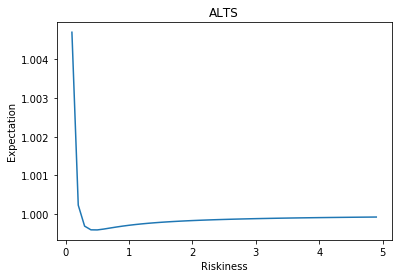

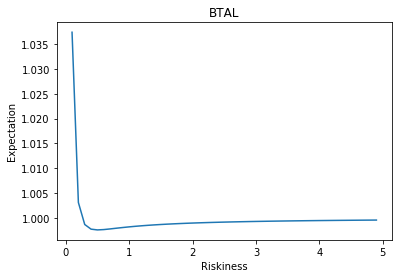

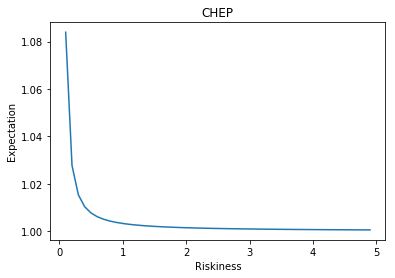

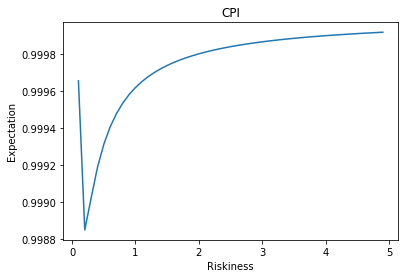

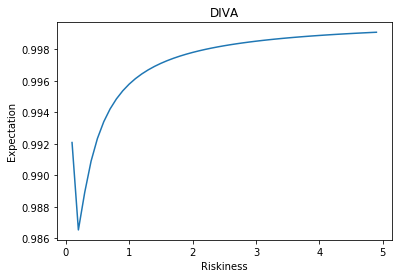

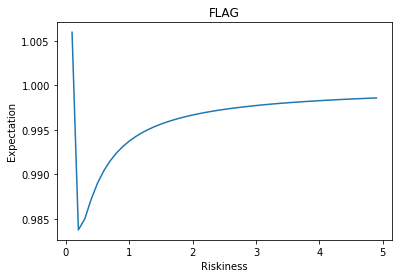

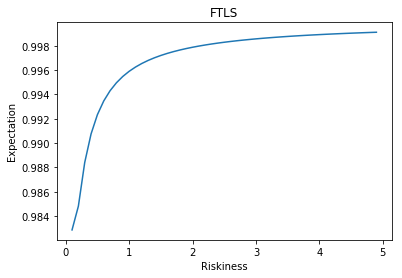

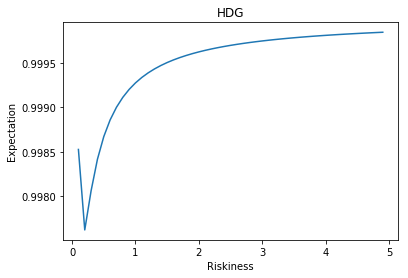

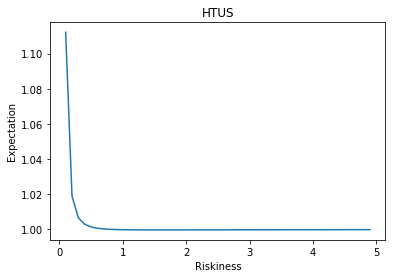

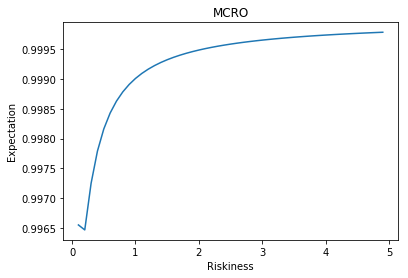

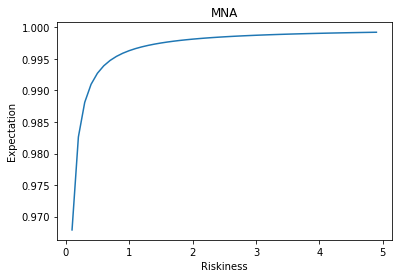

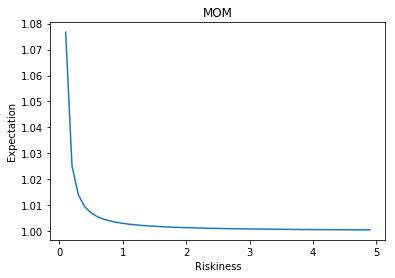

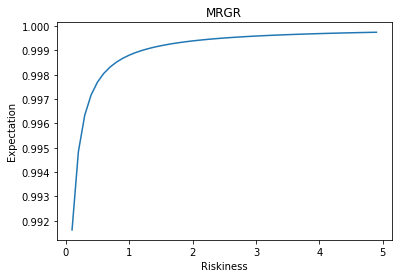

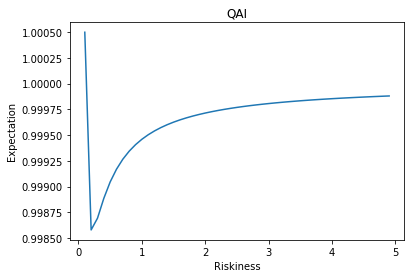

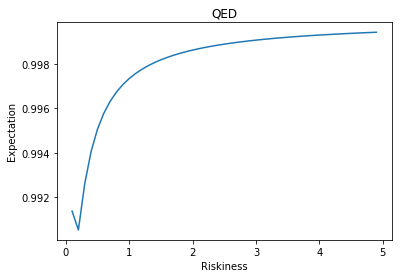

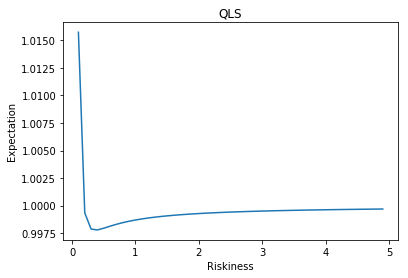

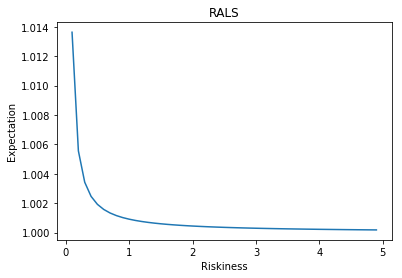

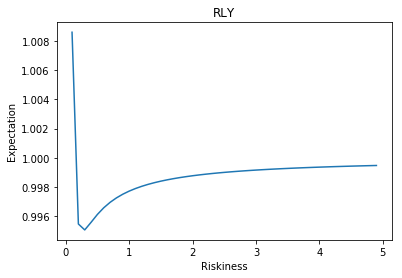

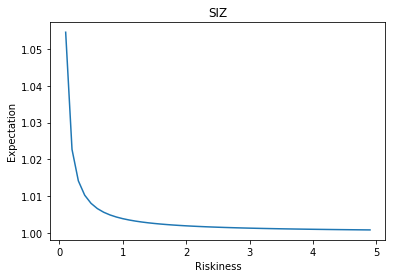

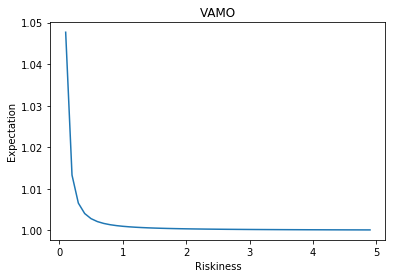

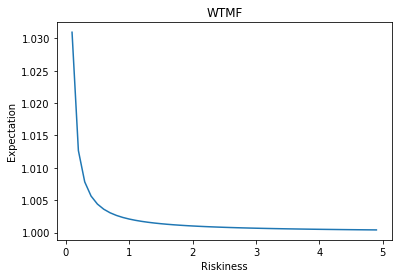

In [65]:
%matplotlib inline
data_file = '../../HW1/ETF_data_set/return_data/Alternatives ETF List (35)/Alternatives ETF List (35)_return.csv';
df = pd.read_csv(data_file)
etf_list = list(df.columns)[1:]
for etf_name in etf_list:
    arr_returns = df[etf_name]
    arr_x,arr_y = cal_riskiness_index(arr_returns)
    plt.title(etf_name)
    plt.plot(arr_x,arr_y)
    plt.xlabel('Riskiness')
    plt.ylabel('Expectation')
    plt.show()

In [36]:
df = df.iloc[:,1:]
df.mean(axis=0)

ALTS    0.000366
BTAL    0.002481
CHEP   -0.002739
CPI     0.000420
DIVA    0.004604
FLAG    0.007028
FTLS    0.004362
HDG     0.000788
HTUS    0.001049
MCRO    0.001060
MNA     0.003742
MOM    -0.002604
MRGR    0.001235
QAI     0.000605
QED     0.002844
QLS     0.001580
RALS   -0.000857
RLY     0.002610
SIZ    -0.003636
VAMO   -0.000599
WTMF   -0.001980
dtype: float64